## Question 2 [Leave-One-Out Cross Validation, 15 Marks] 

    I. A special case of K-Fold cross-validation is Leave-One-Out cross-validation where K (i.e., the number of folds/subsets) is equal to the size of the training dataset. In each iteration, one training data point is used as the validation set. Implement a Leave-One-Out cross-validation (CV) function for your KNN regressor: 
    *cv(train.data, train.label, K, numFold=?)* 
    which takes the training data and their labels (continuous values), K value, the number of folds, and returns errors for different folds of the training data.
    
    II. Using the training data in Question 1, run your Leave-One-Out CV. Change the value of K=1,..,15 in your KNN regressor, and for each K compute tthe average of error values you have got for folds. Plot the average of error values versus 1/K for K=1,..,15 in your KNN regressor. Save the plot in your Jupyter Notebook file for Question 2.
    
#### Importing Libraries

In [7]:
library(reshape2) # Reshape
library(ggplot2) # Plots
library(corrplot) # Analyse correlations

#### Importing the Dataset

In [8]:
test <- read.csv("data\\Sintetic1A_test.csv")
train <- read.csv("data\\Sintetic1A_train.csv")

# Create a column for index in the dataframes for support
row.names(train) <- 1:nrow(train)

# Create a column for index in the dataframes for support
train.data <- train[1]
train.label <- train[2]

#### KNN Function

In [9]:
# CV function
cv <- function(train.data, train.label, K, numFold = nrow(train.data)){
    
    error.vector <- c()
    random.sample <- sample(1:nrow(train.data), size = numFold, replace = FALSE)
        
    for (i in random.sample){
        
        ## Define new data
        validation.data <- train.data[i,]
        trainning.data <- train.data[-i,]

        ## Define validation features
        validation.label <- train.label[i,]
        trainning.label <- train.label[-i,]
       
        ## calculate distances between samples
        dist <- as.matrix(dist(c(validation.data, trainning.data), method= 'manhattan'))[1,-1]
    
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist, index.return = TRUE))[1:K,2]
        
        ###... and calculate the predicted label according to the majority vote
        predicted.label <- sum(train.label[nn,])/K
        
        ###... Find error and store on vector
        error.vector <- c(error.vector, (validation.label - predicted.label)^2)
        
    }
    
    ## return the class labels as output
    return (round(error.vector,3))
}

    II. Using the training data in Question 1, run your Leave-One-Out CV. Change the value of K=1,..,15 in your KNN regressor, and for each K compute the average of error values you have got for folds. Plot the average of error values versus 1/K for K=1,..,15 in your KNN regressor. Save the plot in your Jupyter Notebook file for Question 2.

In [10]:
df_error <- data.frame('K'=1:15, 'error'=rep(0,15)) #support table with errors rates

for (k in 1:15){
    df_error[k,'error'] <- mean(cv(train.data, train.label, K = k)) # train error
}

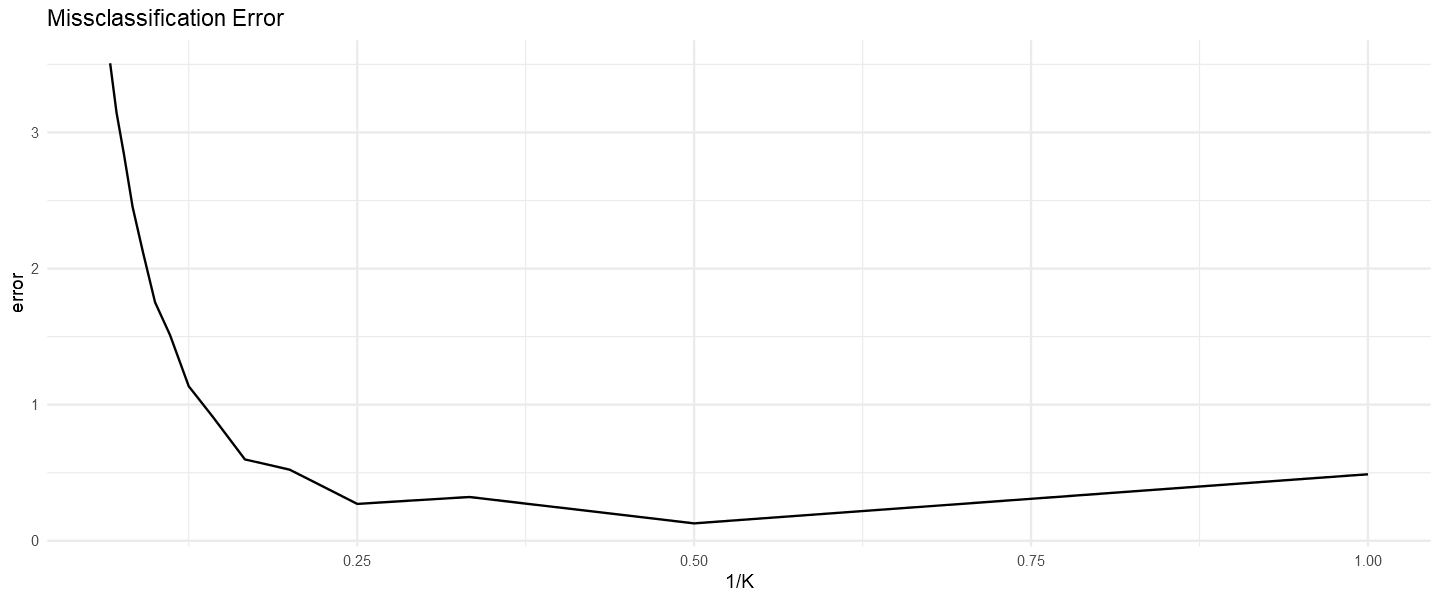

In [11]:
options(repr.plot.width=12, repr.plot.height=5) # area of display

ggplot(data=df_error, aes(x=1/K, y=error)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Missclassification Error")

    III. Report (in your Jupyter Notebook file) the optimum value for K based on your plot for this Leave-One-Out cross validation in the previous part (Part II).

In [12]:
min.error <- min(df_error$error)
min.K <- df_error[df_error$error == min.error,"K"]
cat("Optimal Parameter: ", min.K)

Optimal Parameter:  2

After importing the KNN function and performed the Leave-One-Out Cross Validation simulations we have found the optimal `K = 2`.  